Wczytano zbiór danych zawierających informacje dotyczące preferencji, zainteresowań, nawyków, opinii i obaw młodych ludzi (badanie na Słowacji). W opracowaniu tym sprawdzono różnice między płciami. Podjęto także próbę matematycznego wymodelowania zależności odpowiedzi od płci. Modelowanie to polegało by na wyznaczeniu płci w przypadku gdyby wszystkie pozostałe dane były by wypełnione a kwestionariusz nie zawierałby płci (aby utrudnić pominięto wagę i wzrost). 

In [1]:
import pandas as pd 
responses_data = pd.read_csv("responses.csv") 

Poniżej znajduje się wycinek zbioru danych. Dane przedstawiają wyniki ankiety w 5 stopniowej skali. Na przykład, dla stwierdzen typu "I enjoy listening to music", "I live a very healthy lifestyle" itp. ankietowani wybierali odpowiedzi na pytanie "Strongly disagree 1-2-3-4-5 Strongly agree".

In [2]:
responses_data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [3]:
responses_data.tail()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats
1009,5.0,5.0,4.0,3.0,2.0,3.0,3.0,4.0,1.0,1.0,...,21.0,185.0,72.0,1.0,male,right handed,secondary school,no,village,house/bungalow


In [4]:
# responses_data.dtypes

Zbiór zawiera znaczną część pustych obserwacji. Pozbycie się ich uniemożliwi dalszą analizę.

In [5]:
responses_data.isnull().sum().sum()

608

Zmienna płeć jest nie równomiernie rozłożona w całym zbiorze. Z tego powodu na wykresach należy porównywać wartości względne np. średnia. Kwestionariusz wypełniło około 60% kobiet, a mężczyzn było tylko 40%.

In [6]:
responses_data['Gender'].value_counts()

female    593
male      411
Name: Gender, dtype: int64

Na wykresie pudełkowym porównano kilka najważniejszych preferencji. Większość z tych wykresów w zależności od płci wygląda bardzo podobnie. Szczególnie uwagę przyciąga muzyka, która dla obu płci była oceniana bardzo wysoko.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B69A278>,
      dtype=object)

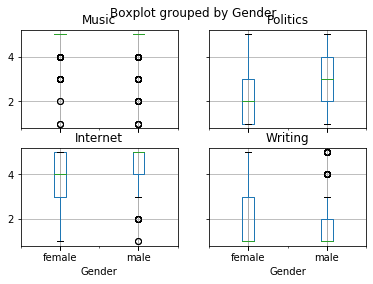

In [11]:
responses_data.boxplot(by ='Gender', column =['Music','Politics','Internet','Writing'])

Na wykresie poniżej sprawdzono różnice w podstawowych grupach, ale tym razem na wykresie liniowym. Widać, że linia dla mężczyzn i dla kobiet, która oznacza średnią ocenę jest nieco inna dla każdej z płci. W badanym zbiorze jest 150 kolumn, więc na wykresie sprawdzono tylko kilka arbitralnie wybranych zmiennych, ale w dalszej części opracowania będą branę pod uwagę wszystkie.

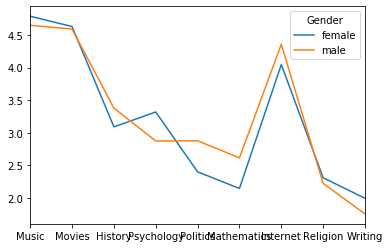

In [12]:
responses_data[['Music','Movies','History','Psychology','Politics','Mathematics','Internet','Religion','Writing','Gender']].groupby(['Gender']).mean().transpose().plot()

Polecenie poniżej sprawdza typ przykładowych zmiennych. Jest to potrzebne do dalszych transformacji. Niektóre obliczenia mogą być przeprowadzane jedynie na typach numerycznych.

In [13]:
responses_data[['Gender','Music']].dtypes

Gender     object
Music     float64
dtype: object

Na początku opracowania badano braki danych. Najważniejszą zmienną z punktu widzenia opracowania jest płeć. Zatem w przypadku pustego pola płeć dane te nie będą branę pod uwagę. Uprzedzając pytania możemy dla tych obserwacji wyznaczyć płeć lecz nie będzie możliwości sprawdzenia tego w praktyce.

In [14]:
# responses_data['Gender']
print("Gender: ",responses_data['Gender'].unique())

Gender:  ['female' 'male' nan]


In [15]:
responses_data=responses_data.loc[responses_data['Gender'].isin(['male','female'])]

Zmienną płeć zamieniono na 0 i 1. Odpowiednio 0 dla kobiet i 1 dla mężczyzn.

In [16]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
responses_data[['Gender']]=le.fit_transform(responses_data[['Gender']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
cols = [col for col in responses_data.columns if col not in ['Weight','Height']]
data = responses_data[cols]
target = responses_data['Gender']
data.head(n=2)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on gadgets,Spending on healthy eating,Age,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,1,3.0,20.0,1.0,0,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,5,2.0,19.0,2.0,0,right handed,college/bachelor degree,no,city,block of flats


In [18]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
responses_data_num = responses_data.select_dtypes(include=numerics)

In [19]:
cols = [col for col in responses_data_num.columns if col not in ['Gender','Height','Weight']]
data = responses_data_num[cols]
target = responses_data['Gender']
data.head(n=2)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Number of siblings
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,1.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,3.0,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,2.0


In [20]:
data=data.fillna(round(data.mean())).astype('float32')

data = data.reset_index()

In [21]:
# data.dtypes

In [22]:
from sklearn.model_selection import train_test_split


In [23]:
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [24]:
data.isnull().sum().sum()

0

# Predict gender

Za pomocą modeli matematycznych wyznaczono płeć. Podzielono zbiór na część uczącą i testową. Oznacza to, że 70% danych posłużyło do wytrenowania modelu, a pozostałe 30% do jego sprawdzenia. Za pomocą klasyfikatora naiwnego bayesa otrzymano 89% skuteczności. Za pomocą liniowego wektora wspierającego otrzymano 88% skuteczności, a za pomocą klasyfikatora najbliższego sąsiada otrzymano 69% skuteczności. Można teraz wyznaczyć brakujące wartości płci, ale nie ma z czym ich porównać.

# Naive-Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gnb = GaussianNB()
pred = gnb.fit(data_train, target_train).predict(data_test)
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.8940397350993378


# LinearSVC

In [26]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
svc_model = LinearSVC(random_state=0)
pred = svc_model.fit(data_train, target_train).predict(data_test)
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.8807947019867549


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## K-Neibhour

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data_train, target_train)
pred = neigh.predict(data_test)
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.6887417218543046
